# Fix pathing

In [1]:
import sys
sys.path.append("..")

import os
import constants

constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))


# Init

In [2]:
import datahandler


dataset_id = "oslo"

data_preprocessor = datahandler.DataPreprocessorOUS(dataset_id)
data_preprocessor.execute()

data_loader = datahandler.DataLoader(dataset_id)
data_loader.execute()


Loading dataset: 100%|██████████| 4/4 [00:07<00:00,  1.99s/it]


# Plot

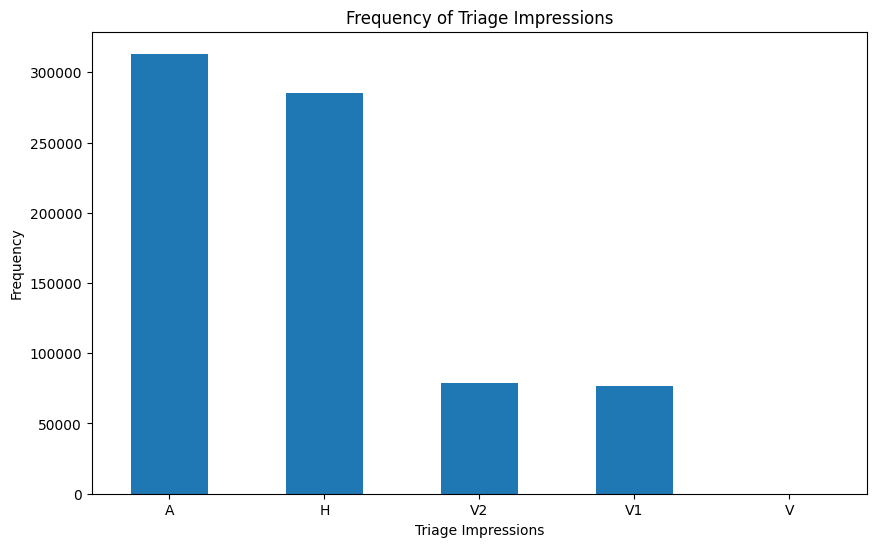

In [3]:
import matplotlib.pyplot as plt


value_counts = data_loader.processed_incidents_df["triage_impression_during_call"].value_counts()

value_counts.plot(kind='bar', figsize=(10,6))
plt.title('Frequency of Triage Impressions')
plt.ylabel('Frequency')
plt.xlabel('Triage Impressions')
plt.xticks(rotation=0)
plt.show()
